In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Exploring how survival rate varies across different ethnicity and gender

I will be exploring how the survival rate of patients differ between ethnicity and gender for US ICU hospital database in 2021.

## Ethnicity

I will be exploring ethnicity in this section.

In [38]:
#Importing the dataset
patients = pd.read_csv("dataset.csv")
patients.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [56]:
#Number of patients in each race
patients.groupby("ethnicity")["ethnicity"].count()

ethnicity
African American     9547
Asian                1129
Caucasian           70684
Hispanic             3796
Native American       788
Other/Unknown        4374
Name: ethnicity, dtype: int64

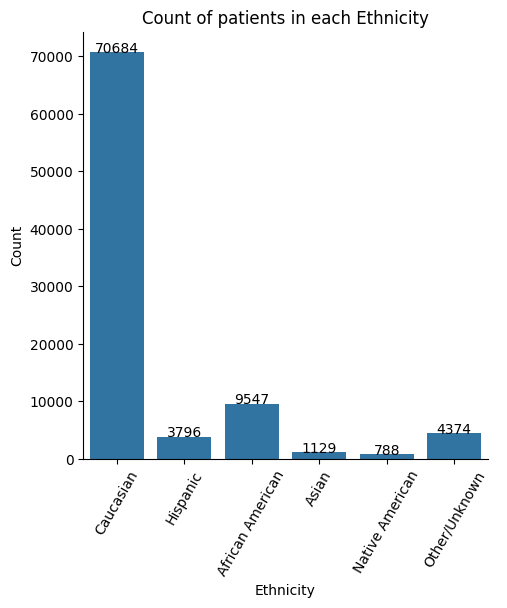

In [110]:
plot1 = sns.catplot(patients, x="ethnicity", kind="count")
plot1.tick_params(axis="x", rotation=60)
plot1.set(title="Count of patients in each Ethnicity", xlabel="Ethnicity", ylabel="Count")
ax = plot1.axes[0][0]  # Accessing the Axes object
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3,
            int(p.get_height()),
            ha = 'center')

In [72]:
patients.groupby("ethnicity")["ethnicity"].count()/len(patients)

ethnicity
African American    0.104096
Asian               0.012310
Caucasian           0.770709
Hispanic            0.041390
Native American     0.008592
Other/Unknown       0.047692
Name: ethnicity, dtype: float64

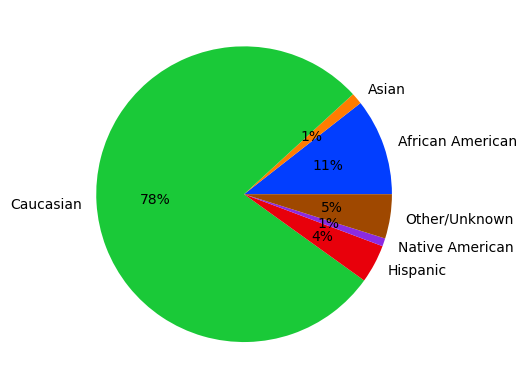

In [112]:
#Number of patients in each race in percentages
palette_color = sns.color_palette('bright')
plt.pie(patients.groupby("ethnicity")["ethnicity"].count()/len(patients), labels=patients.groupby("ethnicity")["ethnicity"].count().keys(), colors=palette_color, autopct='%.0f%%')
plt.show()

Here we see that there are 70684 patients of the 90318 patients in the data are Caucasion patients (77.07%). Comparing this to the US Census Bureau statistics in 2020 which found that...(compare to the US census data on race). 
It is also important to note that there are only 788 patients that are native American which is not a lot. 

In [52]:
#Average hospital death rate
patients["hospital_death"].mean()

0.08630183289173836

In [148]:
#Average hospital death rate by ethnicity
patients.groupby("ethnicity")["hospital_death"].mean()

ethnicity
African American    0.078559
Asian               0.082374
Caucasian           0.087262
Hispanic            0.099052
Native American     0.088832
Other/Unknown       0.080704
Name: hospital_death, dtype: float64

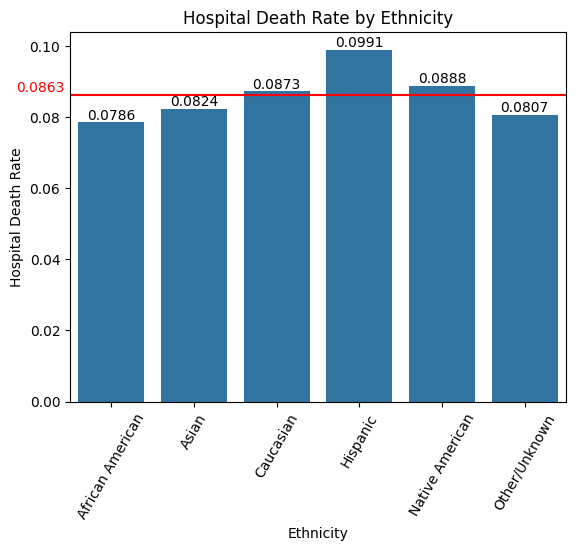

In [144]:
plot3 = sns.barplot(patients.groupby("ethnicity")["hospital_death"].mean())
plot3.tick_params(axis="x", rotation=60)
plot3.set(title="Hospital Death Rate by Ethnicity", xlabel="Ethnicity", ylabel="Hospital Death Rate")
plt.axhline(y=patients["hospital_death"].mean(), c = "red", label = "average hospital death rate")
plt.text(-1.15, patients["hospital_death"].mean(),'0.0863', verticalalignment='bottom', color='r')
for p in plot3.patches:
    plot3.annotate(format(p.get_height(), '.4f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')

Here we see that African Americans have the lowest mortality rate of 7.86% and Hispanics have the highest mortality rate of 9.9%. 

## Gender

In this section, we will be exploring gender.

In [40]:
patients.groupby("gender")["gender"].count()/len(patients)

gender
F    0.460338
M    0.539389
Name: gender, dtype: float64

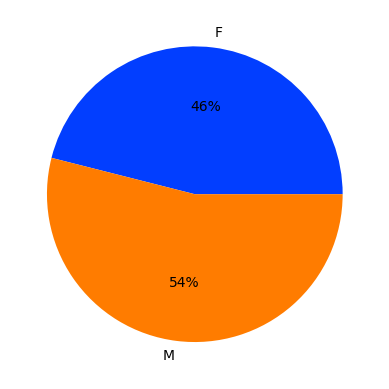

In [126]:
plt.pie(patients.groupby("gender")["gender"].count()/len(patients), labels=patients.groupby("gender")["gender"].count().keys(), colors=palette_color, autopct='%.0f%%')
plt.show()

Here, we see that the dataset consists of 46.03% femail and 53.94% male. Comparing this to the US Census in 2020 where 49.1% female and 50.9% were male, we see that there seems to be more male visiting the hospitals compared to females. 

In [146]:
#Average hospital death rate by gender
patients.groupby("gender")["hospital_death"].mean()

gender
F    0.088373
M    0.084417
Name: hospital_death, dtype: float64

We see that females have a 0.4% higher mortality rate in hospitals compared to males.

# Exploring the APACHE Score

Currently,the metric for determining ICU mortality is the APACHE Score. We will be examining its relavance to Hospital Mortality rate. We will be seeing if the metric is a good metric and if there are variables we can add to improve the metric or drop any unimportant metric.